## Support Vector Machine

### Importing the required Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### Reading the data

In [2]:
df = pd.read_csv('bank-additional-full.csv', delimiter=";") # load the dataset using pandas

In [3]:
df.head(5) # inspect the top five row of the data set

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
df.shape # checks the numbe rof rows and column

(41188, 21)

The dataset contains **41188** rows and **21** columns

In [6]:
df.info() # check the data type of each column and counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

All columns seems to be in the right datatype

### Cleaning The data

In [7]:
df.isnull().sum()  # check the number of missing values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

There are no null values, but some columns are filled with unknown

In [8]:
df.duplicated().sum() #xhecks for number of duplicated columns

12

There are 12 duplicated rows in the dataset

In [9]:
duplicated_df= df[df.duplicated()] # drops the duplicated rows
df = df.drop(duplicated_df.index)

In [10]:
 print(f'New dataset rows and columns equal {df.shape[0]} and {df.shape[1]} respectively')

New dataset rows and columns equal 41176 and 21 respectively


### Exploratory Data Analysis

In [11]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
df.groupby(by='y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.910994,220.868079,2.633385,984.109396,0.132414,0.248885,93.603798,-40.593232,3.811482,5176.165690
yes,40.912266,553.256090,2.051951,791.990946,0.492779,-1.233089,93.354577,-39.791119,2.123362,5095.120069


Correlation Matrix 



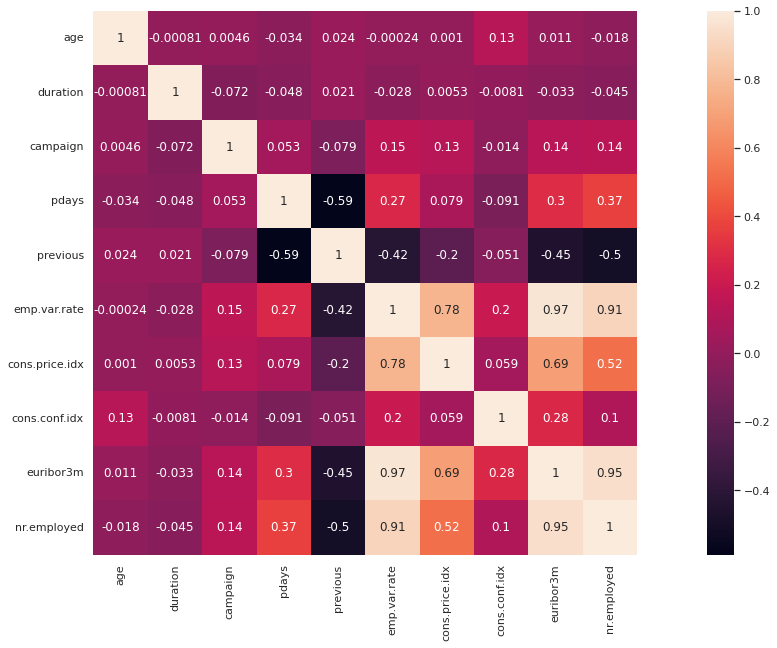

In [13]:
#Heat map
print("Correlation Matrix","\n")    
correlation=df.corr(method="pearson")
plt.figure(figsize=(25,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True)
plt.show()


In [14]:
df=df.drop(columns=['cons.price.idx', 'euribor3m', 'nr.employed']) #These columns are drop because of the high correlection rate

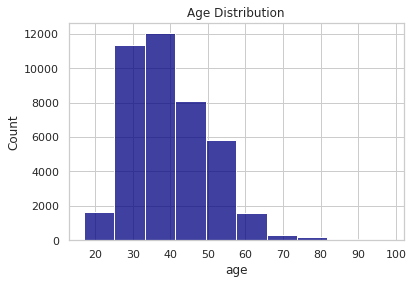

In [15]:
sns.histplot(data=df, x='age', color= 'navy',bins=10 )#distribution of customer age
plt.title('Age Distribution')
plt.show()

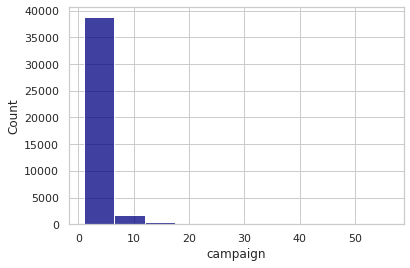

In [16]:
#df['campaign'].value_counts()
sns.histplot(data=df, x='campaign', color= 'navy', bins=10)
plt.show()

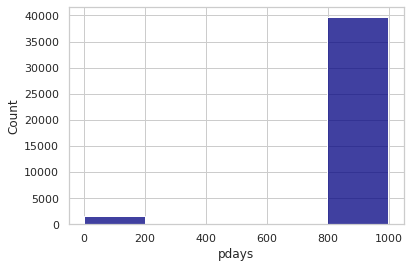

In [17]:
sns.histplot(data=df, x='pdays', color= 'navy', bins=5)
plt.show()

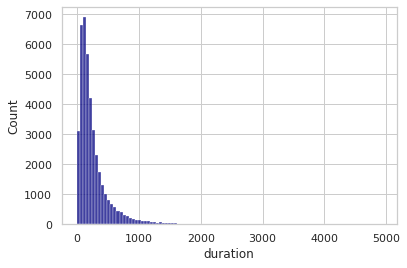

In [18]:
sns.histplot(data=df, x='duration', color= 'navy',bins=100 )
plt.show()

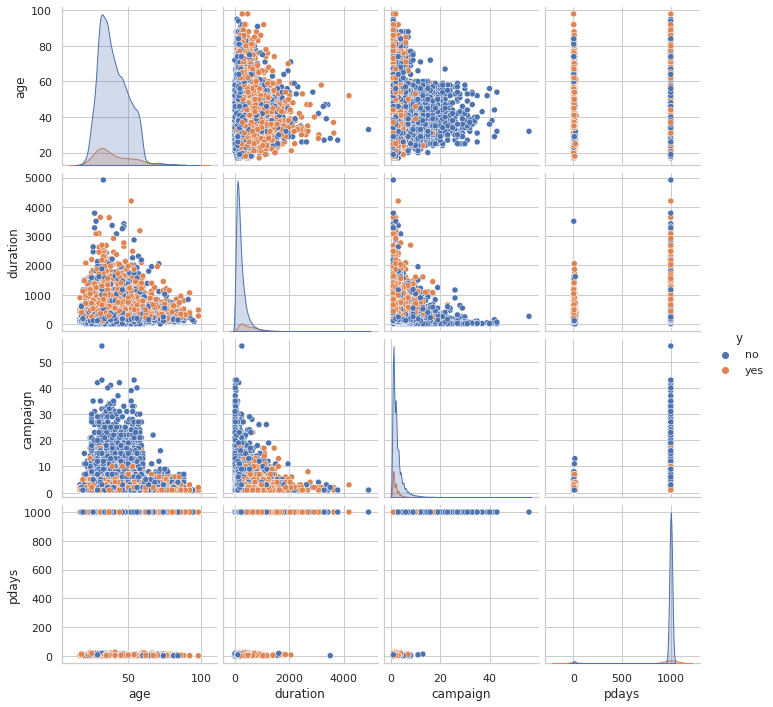

In [19]:
sns.pairplot(df[['age','duration','campaign','pdays', 'y']], hue = "y")

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


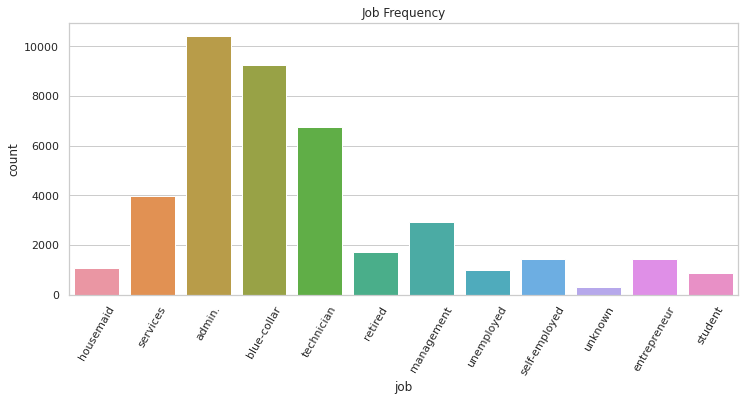

In [20]:
print(df['job'].value_counts())
plt.figure(figsize=(12,5))
sns.countplot(x='job', data=df) # visulalise the distribution of target column 
plt.xticks(rotation=60)
plt.title('Job Frequency')
plt.show()

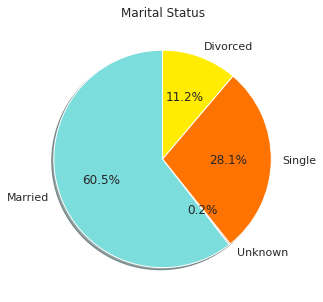

In [21]:
m=df['marital'].value_counts()
#values are list
dev_x = [m['married'], m['unknown'], m['single'], m['divorced']]

plt.figure(figsize=(12,5))

#labeling
color=['#7CDDDD', '#FF0000', '#FF7300','#FFEC00']
label = ['Married', 'Unknown', 'Single', 'Divorced']
explode= [0,0,0.05,0]
plt.title('Marital Status')
#plotting
plt.pie(dev_x, labels=label, colors=color, shadow=True, startangle= 90, autopct ='%1.1f%%')
plt.show()

In [22]:
print(df['contact'].value_counts())
print("-"*30)
print("-"*30)
print(df["month"].value_counts())
print("-"*30)
print("-"*30)
print(df["day_of_week"].value_counts())

cellular     26135
telephone    15041
Name: contact, dtype: int64
------------------------------
------------------------------
may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64
------------------------------
------------------------------
thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64


university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64


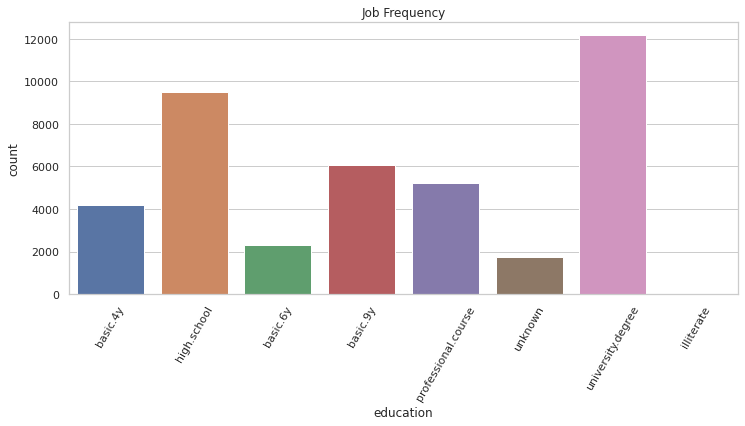

In [23]:
print(df['education'].value_counts())
plt.figure(figsize=(12,5))
sns.countplot(x='education', data=df) # visulalise the distribution of target column 
plt.xticks(rotation=60)
plt.title('Job Frequency')
plt.show()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64


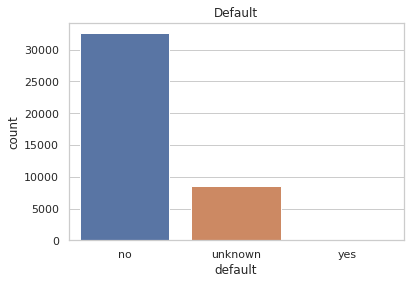

In [24]:
print(df['default'].value_counts()) #default: has credit in default? (categorical)
sns.countplot(x='default', data= df)
plt.title('Default')
plt.show()

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64


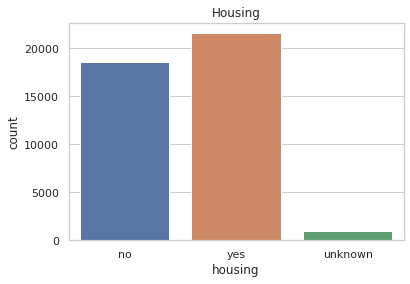

In [25]:
print(df['housing'].value_counts())
sns.countplot(x='housing', data=df)
plt.title('Housing')
plt.show()

no     36537
yes     4639
Name: y, dtype: int64


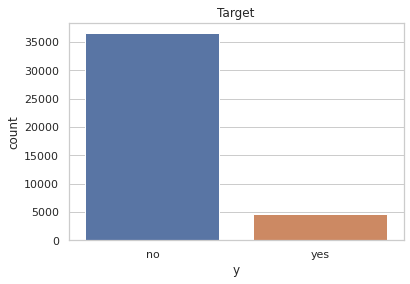

In [26]:
print(df['y'].value_counts())
sns.countplot(x='y', data=df)
plt.title('Target')
plt.show()

### One Hot Encoding

In [27]:
def dummy_encode(column, pref):
    
    one_hot_enco = pd.get_dummies(column, prefix=pref)
    return df.join(one_hot_enco)

In [28]:
df1=dummy_encode(df['marital'], 'mar_')
df=df1.drop(['marital'], axis = 1)
df1=dummy_encode(df['job'], 'job_')
df=df1.drop(['job'], axis = 1)
df1=dummy_encode(df['education'], 'edu_')
df=df1.drop(['education'], axis = 1)
df1=dummy_encode(df['default'], 'def_')
df=df1.drop(['default'], axis = 1)
df1=dummy_encode(df['housing'], 'hou_')
df=df1.drop(['housing'], axis = 1)
df1=dummy_encode(df['loan'], 'lon_')
df=df1.drop(['loan'], axis = 1)
df1=dummy_encode(df['contact'], 'con_')
df=df1.drop(['contact'], axis = 1)
df1=dummy_encode(df['day_of_week'], 'dow_')
df=df1.drop(['day_of_week'], axis = 1)
df1=dummy_encode(df['poutcome'], 'pout_')
df=df1.drop(['poutcome'], axis = 1)
df.head(4)
df1=dummy_encode(df['month'], 'mon_')
df=df1.drop(['month'], axis = 1)

In [29]:
df['y'] = df['y'].map({'no':0, 'yes':1})

In [30]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df['y']==0]
df_minority = df[df['y']==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=4639,     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
df = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df['y'].value_counts()


0    4639
1    4639
Name: y, dtype: int64

In [31]:
X = df.drop('y', axis=1)
y = df['y']

In [32]:
df.head(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.conf.idx,y,mar__divorced,mar__married,...,mon__apr,mon__aug,mon__dec,mon__jul,mon__jun,mon__mar,mon__may,mon__nov,mon__oct,mon__sep
12349,30,1576,3,999,0,1.4,-42.7,0,0,0,...,0,0,0,1,0,0,0,0,0,0
38112,47,159,1,999,1,-3.4,-29.8,0,1,0,...,0,0,0,0,0,0,0,0,0,1
24715,42,151,3,999,1,-0.1,-42.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
37082,51,219,2,999,0,-2.9,-33.6,0,1,0,...,0,0,0,1,0,0,0,0,0,0
31417,39,825,2,999,0,-1.8,-46.2,0,0,1,...,0,0,0,0,0,0,1,0,0,0


### SVM Model Fitting

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
model = SVC()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [35]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [36]:
print('Accuracy of SVM on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of SVM on test set: 0.78


In [37]:
model = SVC(kernel='poly', C=10)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy of SVM after hyperparameter tuning on test set: {:.2f}'.format(model.score(X_test, y_test)))

Accuracy of SVM after hyperparameter tuning on test set: 0.80


### Classification Report

In [38]:
from sklearn.metrics import classification_report

In [39]:
print("SVM","\n")
print("Classification Report","\n")
print("*"*70)
print(classification_report(y_test, y_pred))

SVM 

Classification Report 

**********************************************************************
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       935
           1       0.82      0.76      0.79       921

    accuracy                           0.80      1856
   macro avg       0.80      0.80      0.80      1856
weighted avg       0.80      0.80      0.80      1856



### Cross Validation

In [ ]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10)
model = SVC(kernel='poly', C=10)
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.2f" % (results.mean()))

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt=".1f", linewidths=.3, 
        square = True, cmap = 'PuBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix',size = 12)
plt.show()
print("\n")

The result is telling us that we have **787+696** correct predictions and **148+225** incorrect prediction